## Supervised Learning 3: Non-Linear Univariate Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Non-Linear Univariate Regression

Moving on from Gay-Lussac's law to Boyle's law we encounter a non-linear dependence. Boyle's law states that at a constant temeperature, for a given number of moles of an ideal gas, pressure is inversly proportional to the volume;
$$ P\varpropto \frac{1}{V} $$

How will you learn such a relationship? Let's first generate the dataset assuming a simple exponential relationship 

In [9]:
def Boyle(m, slope,power ):
    '''
    Parameters: 
    V: Volume in mL; P: Pressure in kPa; m: No. of data Points; slope; intercept; noise
    The noise is selected randomly from a normal distribution.
    Returns:
    m number of V,P pairs with P = slope*1/V +intercept + noise
    '''
    np.random.seed(10)
    V = np.random.uniform(0,1.0,10)
    V =np.append(V, np.random.uniform(1.0, 5.0, m-10))
    V.sort()
    noise = np.random.normal(0, 100, m) #the noise has to be much smaller here due to the reduced scale
    P = slope*V**(-power)+noise
    V = V.reshape(m,1)
    P = P.reshape(m,1)
    return V,P, noise

In [10]:
slope =  8000 # is proportional to T in K from gas equation.
# chosen such that the curvature can be capture within the data.
powerB = 0.1
V_B,P_B, noise = Boyle(50, slopeB, powerB)

d1 = {'Volume': V_B[:,0], 'Pressure': P_B[:,0]}
df1 = pd.DataFrame(data=d1)
df1.iloc[:10]

,Volume,Pressure
0,0.020752,11706.020167
1,0.088340,10175.775306
2,0.169111,9522.013411
3,0.198063,9437.318938
4,0.224797,9344.275692
5,0.498507,8562.010119
6,0.633648,8370.873593
7,0.748804,8263.711741
8,0.760531,8168.027974
9,0.771321,8281.257132


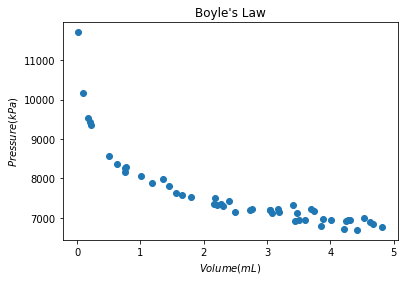

In [11]:
plt.scatter(V_B,P_B)
plt.xlabel('$Volume (mL)$')
plt.ylabel('$Pressure (kPa)$')
plt.title("Boyle's Law")
plt.show()

Now you are given the data and the plot above, without the axes labeled. You don't know this is a $P-V$ plot, and you have to figure out what is the relationship between the x and the y-axes.

This time, we will separate the whole dataset into training set and test set in the ratio $(4:1)$ rather than defining a separate dataset.

In [12]:
from sklearn import model_selection
gen = np.random.RandomState(seed=44)
V_train, V_test, P_train, P_test = model_selection.train_test_split(V_B, P_B, test_size=.25,shuffle = True,random_state=gen)

How well will a linear regression model perform for prediction of $P$ with respect to $V$?

In [15]:
from sklearn import linear_model
m = len(P_train)
fit_B = linear_model.LinearRegression(fit_intercept=True).fit(V_train,P_train)
w = fit_B.coef_
b= fit_B.intercept_
print('Coefficient: \n', w)
print('Intercept:\n ', b)

Coefficient: 
 [[-612.43028365]]
Intercept:
  [9168.09596762]


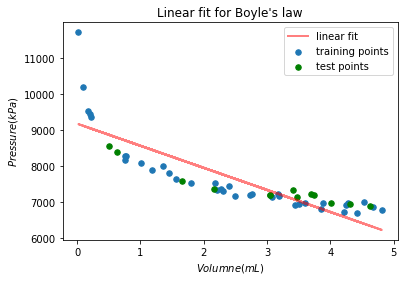

In [16]:
plt.scatter(V_train, P_train, s= 30, label='training points')
plt.scatter(V_test, P_test, c= 'g',s = 30, label='test points')
plt.plot(V_train, V_train.dot(w_1) + b_1, 'r-', lw=2.0, alpha=0.5, label='linear fit')
plt.xlabel('$Volumne(mL)$')
plt.ylabel('$Pressure (kPa)$')
plt.legend()
plt.title("Linear fit for Boyle's law")
plt.show()

If we calculate the error in the training set as well as the test set, 

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
P_pred1 = fit_B.predict(V_train)
print("Mean squared error in the training set: %.2f"
      % mean_squared_error(P_train, P_pred1))
print('r_2 statistic for the training set: %.2f' % r2_score(P_train, P_pred1))
print("Mean absolute error in the training set: %.2f"
      % mean_absolute_error(P_train, P_pred1))

Mean squared error in the training set: 346543.52
r_2 statistic for the training set: 0.70
Mean absolute error in the training set: 419.56


In [19]:
P_pred2 = fit_B.predict(V_test)
print("Mean squared error in the test set: %.2f"
      % mean_squared_error(P_test, P_pred2))
print('r_2 statistic for the test set: %.2f' % r2_score(P_test, P_pred2))
print("Mean absolute error in the test set: %.2f"
      % mean_absolute_error(P_test, P_pred2))

Mean squared error in the test set: 127224.84
r_2 statistic for the test set: 0.49
Mean absolute error in the test set: 319.22


The $R^2$ values indicate how poor the fit is. Linear regression fails to recognise the non-linear dependence of $P$ on $V$. This is known as **underfitting** for univariate nonlinear regression. 

For higher order polynomial fitting,

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Define grids used for the plot
#Change V_plot to change the range of volume considered in Boyle()
V_plot = np.linspace(np.min(V_B), np.max(V_B), 100)
V_plot = V_plot[:, np.newaxis]

def polynomial(degree, V_set):
    """Parameters: 
    Polynomial of 'degree' will be fitted for the training set V_train,P_train
    Returns: Prediction for V_set (V_train, V_test etc.) """
            
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(V_train, P_train)
    return model.predict(V_set)

Now we will try to fit polynomials of degree $2,3$ and $4$ on the training set. 

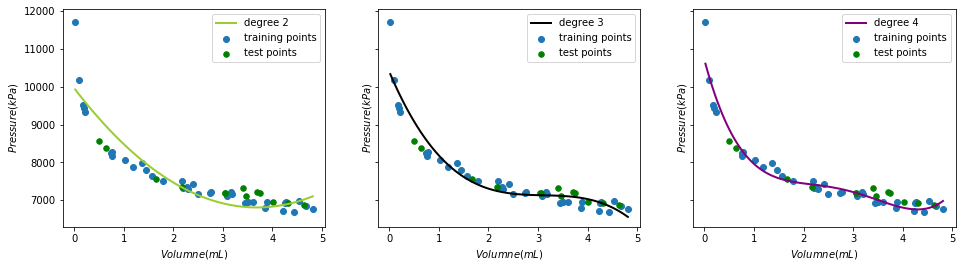

In [21]:
colors = ['yellowgreen', 'black', 'purple']
lw = 2

fig, axs = plt.subplots(1, 3, figsize=(16, 4), sharey=True)
for count, degree in enumerate([2, 3, 4]):
    axs[count].scatter(V_train,P_train, label = "training points" )
    axs[count].scatter(V_test, P_test, c= 'g',s = 30, label='test points')
    axs[count].plot(V_plot, polynomial(degree, V_plot), color=colors[count], linewidth=lw,
             label="degree %d" % degree) 
    axs[count].set_xlabel('$Volumne(mL)$')
    axs[count].set_ylabel('$Pressure (kPa)$')
    axs[count].legend()
   

None of the polynomials seem to fit well for all ranges of $V$. 

But how will we know which polynomial fit will be the most appropriate for the $V-P$ fit? For that we have to optimize the degree of the polynomial


#### Hyperparameter Optimization Through Cross-Validation

A model hyperparameter is a paramter that is external to the model and whose value cannot be estimated from the data. In the example we are discussing, the degree of the polynomial is an hyperparameter. 

To choose the optimal hyperameter, we need to check the error on a set of data that does not include the training points. It will be clear in a moment why this is necessary. By convention, this set should not be the test set as we evaluate the overall performance of the model on the test set and the model should not see any data from the test set during training.Constrasts can be found in different research papers).Hyperparameter optimization is a part of deciding the form of the model. Hence we have to keep aside some data from the training set for the hyperparameter optimization. This separate set is coined as cross-validation set. 

We will devide our originally available data in three way now,

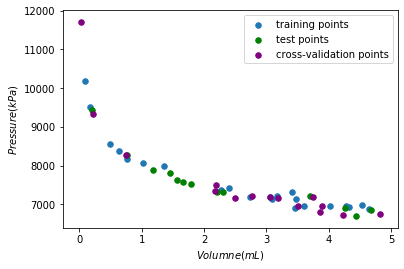

In [27]:
V_train, V_test, P_train, P_test = model_selection.train_test_split(V_B, P_B, test_size=.25, random_state=gen)
V_train, V_cv, P_train, P_cv = model_selection.train_test_split(V_train, P_train, test_size=.40, random_state=gen)

plt.scatter(V_train, P_train, s= 30, label='training points')
plt.scatter(V_test, P_test, c= 'g',s = 30, label='test points')
plt.scatter(V_cv, P_cv, c= 'purple',s = 30, label='cross-validation points')
plt.xlabel('$Volumne(mL)$')
plt.ylabel('$Pressure (kPa)$')
plt.legend()
plt.show()

Our original test set remains uneffected and constitutes $25\%$ of the original data. The remaining data is further split randomly into training set and cross-validation set in 4:1 ratio. 

There are other ways to do cross-validation like k-fold cross-validation, which will be explained in the Kernel Ridge Regression notebook. Now we calculate the mean-square error for each of these polynomial fittings and compare them

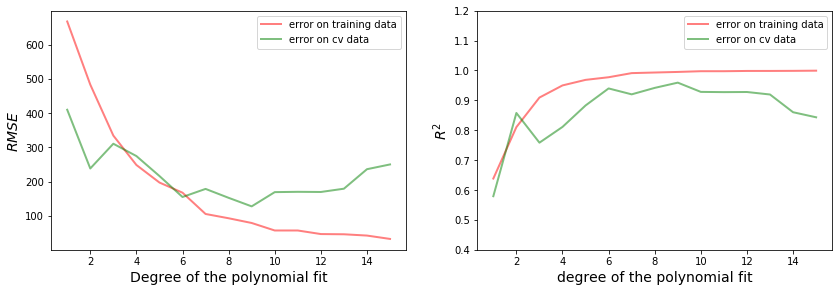

In [23]:
error_train = []
error_cv = []
r2_train = []
r2_cv = []
x = np.arange(1,16,1)
#for j in range(4):
for i in range(len(x)):
    P_predTr = polynomial(x[i], V_train)
    P_predCV = polynomial(x[i],V_cv)
    error_train.append(np.sqrt(mean_squared_error(P_train, P_predTr)))
    error_cv.append(np.sqrt(mean_squared_error(P_cv, P_predCV)))
    r2_train.append(r2_score(P_train, P_predTr))
    r2_cv.append(r2_score(P_cv, P_predCV))
    
fig, axs = plt.subplots(1, 2, figsize=(14, 4.4), sharey=False)
axs[0].plot(x, error_train, 'r-', lw=2.0, alpha=0.5, label='error on training data')
axs[0].plot(x, error_cv, 'g-', lw=2.0, alpha=0.5, label='error on cv data')
axs[0].set_xlabel('Degree of the polynomial fit', size = 14)
axs[0].set_ylabel('$RMSE$', size = 14)
axs[0].legend()

axs[1].plot(x, r2_train, 'r-', lw=2.0, alpha=0.5, label='error on training data')
axs[1].plot(x, r2_cv, 'g-', lw=2.0, alpha=0.5, label='error on cv data')
axs[1].set_xlabel('degree of the polynomial fit', size = 14)
axs[1].set_ylabel('$R^2$', size = 14)
axs[1].set_ylim(0.4,1.2)
axs[1].legend()

plt.show()

As we see, the error in the training set goes down with increasing degree of the polynomial. But for the cross-validtion set, the error first goes down, reseaches a minima and then started to increase again. The optimal value of the hyperparameter is in the range where the error in the cross-validation set is minimum. For the specific training and cross-validation set we have, this value is $9$. 

Same conclusion can be drawn from the goodness of fit measurements. 

This is just to convey the idea of about cross-validation. In prctice,a much more sophisticated approach should be followed. The errors are influenced by size of the dataset and training and cross-validation data locations. The kinks in the cross-validation set error curve are caused by our choice of validation set. Hence, the training:cross-vlidation split should be performed multiple times randomly (with different seeds), errors should be calculated for the plot above each time, and then the average or median value of the optimum hyperparameters obtain from all the runs should be considered as the final hyperparamter. 


#### Bias and Variance

From the RMSE and $R^2$ values we got to know about the optimum degree of the polynomial fit for our dataset. Two preliminary concepts related to this kind of regression problem are overfitting and underfitting. We have already shown an example of underfitting. The training set is underfitted when the error in both the trainig set and the cross-validation sets are compartively higher. On the otherhand, a model is overfitted when the error in the training set is extremely small (goes through every data point), but thr error in the cross-validation is far from its optimum. 

From wikipedia:

 The bias error is an error from erroneous assumptions or over simplification in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs and cause underfitting.
 
 The variance is an error from sensitivity to small fluctuations in the training set or overcomplexity in the model. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs and cause overfitting. 

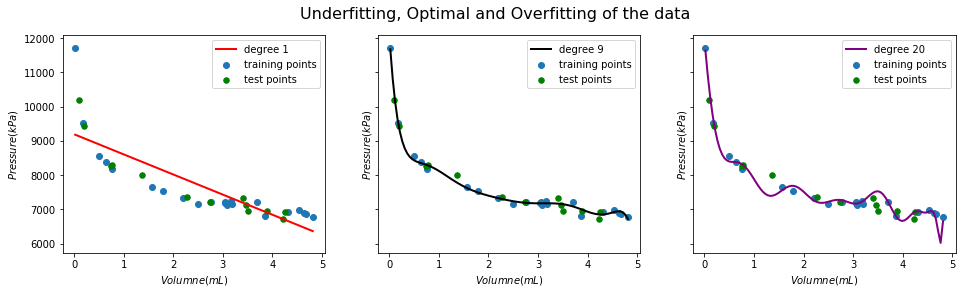

In [26]:
colors = ['red', 'black', 'purple']
lw = 2
fig, axs = plt.subplots(1, 3, figsize=(16, 4), sharey=True)
for count, degree in enumerate([1, 9, 20]):
    axs[count].scatter(V_train,P_train, label = "training points" )
    axs[count].scatter(V_test, P_test, c= 'g',s = 30, label='test points')
    axs[count].plot(V_plot, polynomial(degree, V_plot), color=colors[count], linewidth=lw,
             label="degree %d" % degree) 
    axs[count].set_xlabel('$Volumne(mL)$')
    axs[count].set_ylabel('$Pressure (kPa)$')
    axs[count].legend()
fig.suptitle('Underfitting, Optimal and Overfitting of the data', size = 16)
plt.show()

Note that the noise affects the generated data and hence the optimal fitting hyperparameter. If we have a very large data set, this effect will cancel out. If we calculate the error in the test set for each of these polynomial fitting, it would resemble the behvior of the error in the cross-validation set. 